In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data=pd.read_csv('clean_data.csv')
data.head()

C:\Users\talmo\AppData\Local\Temp\ipykernel_17420\3132916111.py:1: DtypeWarning: Columns (14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('clean_data.csv')


,Origin,Destination,TTT,LOS,Arrival Time,Return Arrival Time,Onward Departure Airport,Onward Arrival Airport,Return Departure Airport,Return Arrival Airport,...,Departure Time Category Num,Return Time Category Num,Is Weekend Flight,Onward Departure Airport Distance,Onward Arrival Airport Distance,Return Departure Airport Distance,Return Arrival Airport Distance,Total Connections,Total Flight Duration(min),Flight Duration Binned
0,London,Paris,1,1,3/7/2025 16:30,3/8/2025 19:25,SEN,CDG,ORY,LGW,...,2,3,True,64,25,13,45,0,135,0-200
1,London,Paris,1,1,3/7/2025 16:30,3/8/2025 14:25,SEN,CDG,ORY,LHR,...,2,2,True,64,25,13,23,0,145,0-200
2,London,Paris,1,1,3/7/2025 16:30,3/8/2025 14:50,SEN,CDG,CDG,LGW,...,2,2,True,64,25,25,45,0,135,0-200
3,London,Paris,1,1,3/7/2025 16:30,3/8/2025 12:00,SEN,CDG,ORY,LGW,...,2,1,True,64,25,13,45,0,140,0-200
4,London,Paris,1,1,3/7/2025 16:30,3/8/2025 15:20,SEN,CDG,ORY,LGW,...,2,2,True,64,25,13,45,0,140,0-200


In [4]:
data.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Arrival Time',
       'Return Arrival Time', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Airlines', 'Return Airlines',
       'Onward Flight Connections', 'Onward Connection Duration(min)',
       'Onward Flight Connection Airport', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Return Flight Connection Airport',
       'Carry-ons', 'Checked Bags', 'Price(NIS)', 'Snapshot Date', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)', 'Departure Month', 'Departure Day',
       'Departure Weekday', 'Return Month', 'Return Day', 'Return Weekday',
       'Departure Time Category Num', 'Return Time Category Num',
       'Is Weekend Flight', 'Onward Departure Airport Distance',
       'Onward Arrival Airport Distance', 'Return Departure Airport Distance',
       'Return Arrival Airport Distance', 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527232 entries, 0 to 527231
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Origin                             527232 non-null  object
 1   Destination                        527232 non-null  object
 2   TTT                                527232 non-null  int64 
 3   LOS                                527232 non-null  int64 
 4   Arrival Time                       527232 non-null  object
 5   Return Arrival Time                527232 non-null  object
 6   Onward Departure Airport           527232 non-null  object
 7   Onward Arrival Airport             527232 non-null  object
 8   Return Departure Airport           527232 non-null  object
 9   Return Arrival Airport             527232 non-null  object
 10  Onward Airlines                    527232 non-null  object
 11  Return Airlines                    527232 non-null  

## Correlation Analysis
Before building the model, we analyze the correlation between flight price and numerical features.  

### Steps:  
1. Select only numeric features.  
2. Remove constant columns.  
3. Compute correlations with price.  
4. Visualize correlations with a heatmap.  

This helps identify key predictors and remove irrelevant features.  


In [6]:
# Detect Categorical Fuatures
categorical_cols = data.select_dtypes(include=["object", "category"]).columns.tolist()

print("Categorical Features:", categorical_cols)

Categorical Features: ['Origin', 'Destination', 'Arrival Time', 'Return Arrival Time', 'Onward Departure Airport', 'Onward Arrival Airport', 'Return Departure Airport', 'Return Arrival Airport', 'Onward Airlines', 'Return Airlines', 'Onward Flight Connection Airport', 'Return Flight Connection Airport', 'Snapshot Date', 'Site', 'Flight Duration Binned']


In [7]:
# Convert Origin and Destanation to dummies 
data = pd.get_dummies(data, columns=['Origin', 'Destination','Onward Airlines','Return Airlines','Site'], drop_first=True)


Correlation between numeric variables and flight price:
Price(NIS)                           1.000000
Total Flight Duration(min)           0.439293
Total Onward Flight Duration(min)    0.409827
Total Return Flight Duration(min)    0.386589
Origin_Rome                          0.311024
                                       ...   
Destination_Paris                   -0.127359
Origin_Paris                        -0.150416
Departure Day                       -0.168935
Return Airlines_easyJet             -0.274638
Onward Airlines_easyJet             -0.289028
Name: Price(NIS), Length: 70, dtype: float64


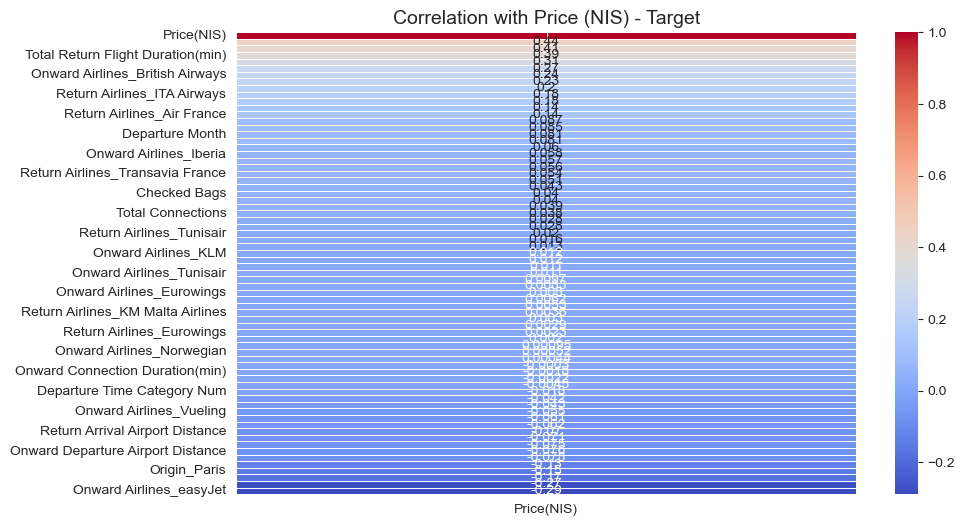

In [8]:
# Selecting only numeric columns
numeric_data = data.select_dtypes(include=['number','bool'])

# Removing constant columns (columns with only one unique value)
numeric_data = numeric_data.loc[:, numeric_data.nunique() > 1]

# Printing correlation of all numeric variables with flight price
print("Correlation between numeric variables and flight price:")
correlation_with_price = numeric_data.corr()['Price(NIS)'].sort_values(ascending=False)
print(correlation_with_price)

# Visualizing the correlation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr()[['Price(NIS)']].sort_values(by='Price(NIS)', ascending=False), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation with Price (NIS) - Target", fontsize=14)
plt.show()


In [9]:
# Define thresholds
low_threshold = 0.05
moderate_threshold = 0.3

# Compute absolute correlation with price
correlation_with_price = abs(numeric_data.corr()["Price(NIS)"]).sort_values(ascending=False)

# Categorize features
low_correlation = correlation_with_price[correlation_with_price < low_threshold].index.tolist()
moderate_correlation = correlation_with_price[
    (correlation_with_price >= low_threshold) & (correlation_with_price < moderate_threshold)
].index.tolist()
strong_correlation = correlation_with_price[correlation_with_price >= moderate_threshold].index.tolist()

# Print results
print("🔴 Features with LOW correlation (< 0.05):")
print(low_correlation)

print("\n🟠 Features with MODERATE correlation (0.05 - 0.3):")
print(moderate_correlation)

print("\n🟢 Features with STRONG correlation (≥ 0.3):")
print(strong_correlation)


🔴 Features with LOW correlation (< 0.05):
['Is Weekend Flight', 'Return Weekday', 'Return Time Category Num', 'Checked Bags', 'Return Airlines_Jet2', 'Onward Airlines_Jet2', 'Total Connections', 'Onward Flight Connections', 'Return Flight Connections', 'Return Airlines_Tunisair', 'Departure Time Category Num', 'Return Month', 'Onward Airlines_Lufthansa', 'Onward Airlines_KLM', 'Return Airlines_Lufthansa', 'Return Airlines_KLM', 'Onward Airlines_Tunisair', 'Return Airlines_SWISS', 'Onward Airlines_SWISS', 'Onward Airlines_Eurowings', 'Onward Airlines_KM Malta Airlines', 'Onward Airlines_Brussels Airlines', 'LOS', 'Return Airlines_KM Malta Airlines', 'Return Airlines_Brussels Airlines', 'Onward Airlines_Scandinavian Airlines', 'Return Airlines_Eurowings', 'Return Connection Duration(min)', 'Return Airlines_Scandinavian Airlines', 'Onward Connection Duration(min)', 'Onward Airlines_Volotea', 'Onward Airlines_Norwegian', 'Return Airlines_Volotea', 'Departure Weekday']

🟠 Features with MODE

We will use the Algo with those features due to high correlation with Price:
* Total Flight Duration(min) (seperated to onward and return)
* Origin
* Onward Airlines
* Return Airlines
* Destination
* Carry-ons
* Site
* Onward Departure Airport Distance
* TTT
* Onward Arrival Airport Distance
* Return Arrival Airport Distance



# Lets See which Attributes to remove that has high correlation between each other

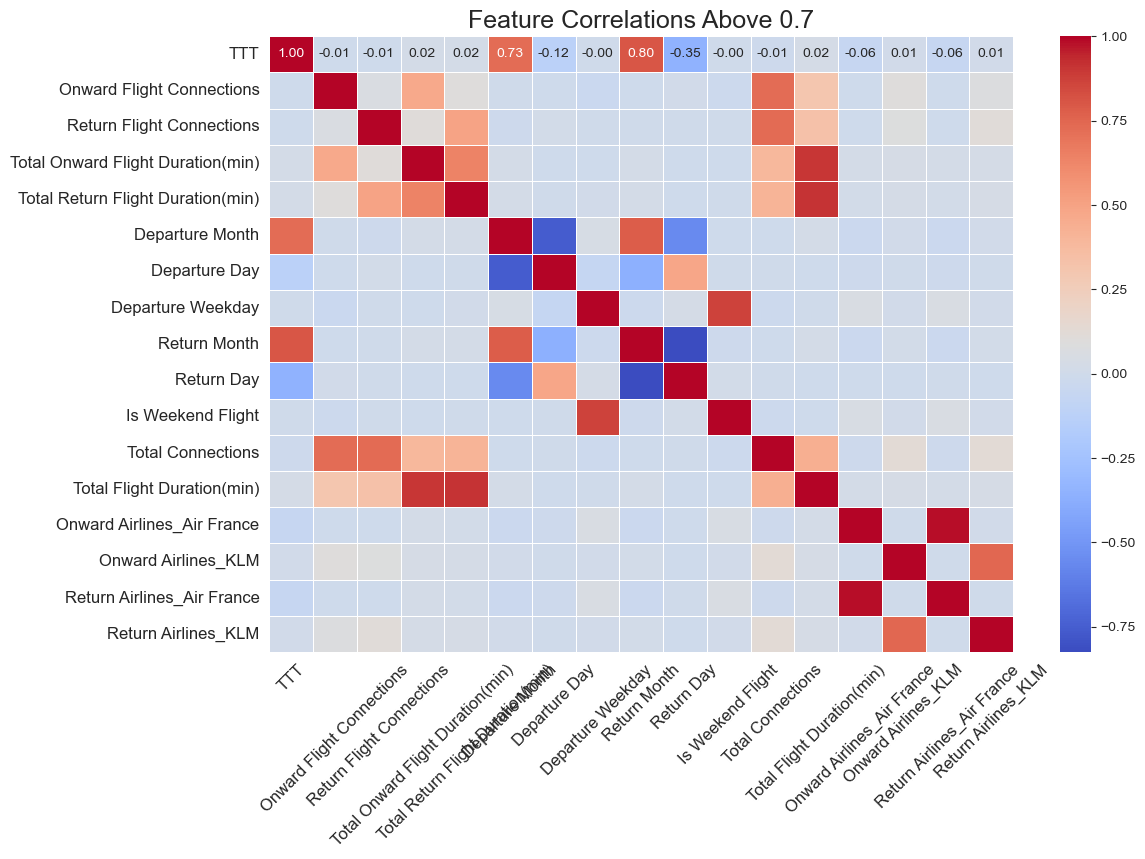

In [10]:
# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Find strong correlations (|corr| > 0.5)
strong_corr = corr_matrix[abs(corr_matrix) > 0.5].dropna(how="all", axis=0).dropna(how="all", axis=1)

# Set a correlation threshold
threshold = 0.7

# Find feature pairs with correlation above the threshold
high_corr_pairs = (corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1.0)

# Filter the matrix
filtered_corr_matrix = corr_matrix.loc[high_corr_pairs.any(axis=1), high_corr_pairs.any(axis=0)]

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"Feature Correlations Above {threshold}", fontsize=18)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()



We Want to drop features with high correlation to each other:
* Total Flight Duration, and keep the onward and return
* We will drop the return and onward month&day, as it correlates with TTT
* We will drop the Is Weekend flight and keep the Weekday
* We can see that when the flight company is KLM or AirFrance the departure and return flights are from teh same company, but it doesnt really correlate to each other. 

## Data Preparation  

Before training the model, we define the features (X) and target variable (y).  

### Steps:  
1. Select all relevant features.  
2. Split the data into training (70%) and testing (30%) sets.  
3. Print dataset sizes to verify the split.  

This ensures the model is trained on one part of the data and evaluated on unseen data.  


In [11]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [12]:
# We will import data again, so we will use the XG feature of categorical features and no dummmie  variables
data=pd.read_csv('clean_data.csv')


C:\Users\talmo\AppData\Local\Temp\ipykernel_17420\598474998.py:2: DtypeWarning: Columns (14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('clean_data.csv')


In [13]:
data.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Arrival Time',
       'Return Arrival Time', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Airlines', 'Return Airlines',
       'Onward Flight Connections', 'Onward Connection Duration(min)',
       'Onward Flight Connection Airport', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Return Flight Connection Airport',
       'Carry-ons', 'Checked Bags', 'Price(NIS)', 'Snapshot Date', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)', 'Departure Month', 'Departure Day',
       'Departure Weekday', 'Return Month', 'Return Day', 'Return Weekday',
       'Departure Time Category Num', 'Return Time Category Num',
       'Is Weekend Flight', 'Onward Departure Airport Distance',
       'Onward Arrival Airport Distance', 'Return Departure Airport Distance',
       'Return Arrival Airport Distance', 

In order to use categorical columns, we have to use one-hot encoding (dummies) or use categorical types

In [14]:
cat_columns = ["Origin", "Destination", "Arrival Time", "Return Arrival Time",
               "Onward Departure Airport", "Onward Arrival Airport", "Return Departure Airport", "Return Arrival Airport",
               "Onward Airlines", "Return Airlines", "Onward Flight Connection Airport", "Return Flight Connection Airport",
               "Snapshot Date", "Site", "Flight Duration Binned"]

for col in cat_columns:
    data[col] = data[col].astype("category")

In [15]:
X= data.drop(columns=['Price(NIS)','Flight Duration Binned','Total Flight Duration(min)'])
y = data['Price(NIS)']

In [16]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (369062, 38), Test set: (158170, 38)


## Initial XGBOOST Model
- Train a **XGBOOST** model.  
- Predict flight prices on the test set.  
- Evaluate performance using **MSE** and **R² Score**. 


In [17]:
xgb=XGBRegressor(objective='reg:squarederror',enable_categorical=True,random_state=101)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 1904.20
R² Score: 0.9556
Mean Absolute Error (MAE): 30.68
Root Mean Squared Error (RMSE): 43.64


### Model Performance  
__________________________________  
- **MSE:** 1904.20 → Measures the average squared error in predictions.  
- **R² Score:** 0.9556 → The model explains 95.56% of the variance in flight prices.  
- **MAE:** 30.68 → The model's average absolute error is 30.68 NIS.  
- **RMSE:** 70.74 → The root mean squared error, which gives a sense of the model's error magnitude, is 43.64 NIS.


### Insights and Next Steps  
___________________
- We got Pretty good prediction, still we want to reduce overfitting chance. 
- To make it more accurate, we check **feature importance** to find the most important predictors.  
- By analyzing feature impact, we can **remove unhelpful features** and improve the model.  

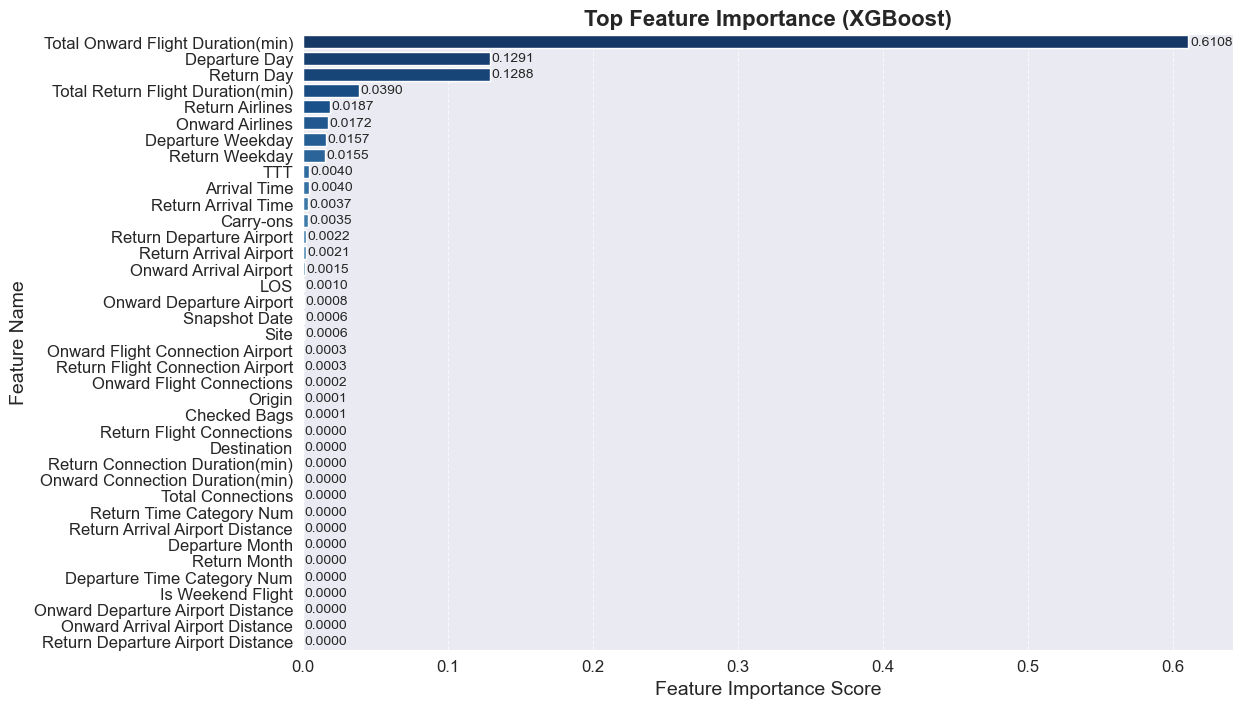

In [18]:
importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": xgb.feature_importances_})

# Sort by importance and keep the top 15 features
importance_df = importance_df.sort_values(by="Importance", ascending=False).tail(50)

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")
ax = sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")  
for index, value in enumerate(importance_df["Importance"]):
    ax.text(value + 0.001, index, f"{value:.4f}", va="center", fontsize=10)
# Beautify the plot
plt.xlabel("Feature Importance Score", fontsize=14)
plt.ylabel("Feature Name", fontsize=14)
plt.title("Top Feature Importance (XGBoost)", fontsize=16, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

### **Permutation Importance - Black Box Approach**

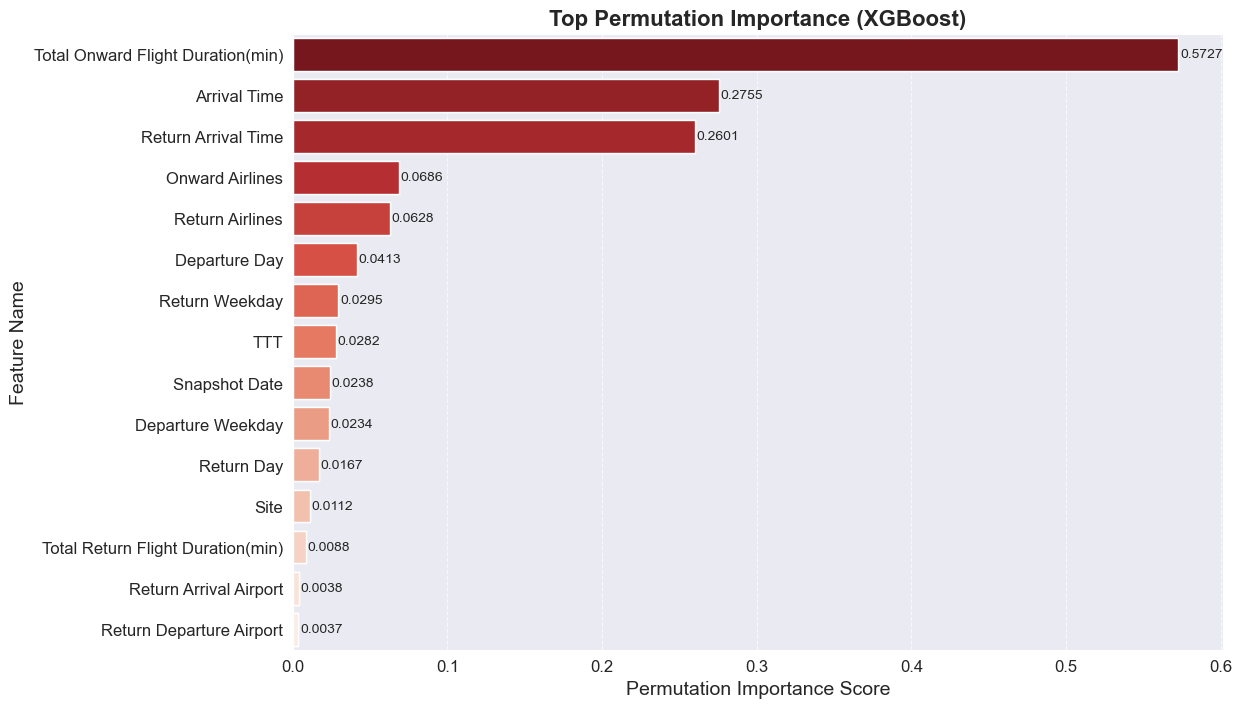

In [19]:
from sklearn.inspection import permutation_importance

# Compute feature importance using Permutation Importance
perm_importance = permutation_importance(xgb, X_test, y_test, scoring='r2', n_repeats=10, random_state=101)

# Create a DataFrame with feature importance scores
perm_importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": perm_importance.importances_mean
})

# Sort by importance and keep the top 15 features
perm_importance_df = perm_importance_df.sort_values(by="Importance", ascending=False).head(15)

# Create a Permutation Importance plot
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=perm_importance_df, palette="Reds_r")
ax = sns.barplot(x="Importance", y="Feature", data=perm_importance_df, palette="Reds_r")  

for index, value in enumerate(perm_importance_df["Importance"]):
    ax.text(value + 0.001, index, f"{value:.4f}", va="center", fontsize=10)

plt.xlabel("Permutation Importance Score", fontsize=14)
plt.ylabel("Feature Name", fontsize=14)
plt.title("Top Permutation Importance (XGBoost)", fontsize=16, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


## 🔍 Comparing XGBoost vs. Permutation Importance  

### **What’s the Difference?**  
- **XGBoost Feature Importance** measures how often a feature is used in model decisions.  
- **Permutation Importance ("black box")** shuffles feature values to see how much predictions change.  

### **Feature Comparison**  

| Feature                          | XGBoost | Permutation | Interpretation |
|----------------------------------|---------|------------|------------------------------|
| **Total Onward Flight Duration** | High    | High       | Important in both methods → Strong predictor |
| **Arrival / Return Time**        | Low     | High       | Ignored by XGBoost but impacts price in real-world factors (demand, time slots) |
| **Departure / Return Day**       | High    | Low        | May not truly affect price → Could be causing overfitting |
| **Airlines (Onward/Return)**     | Medium  | Medium     | Consistently relevant but not the top factor |

### **Key Takeaways**  
- **Total Onward Flight Duration** is a strong predictor in both methods.  
- **Arrival and Return Time matter in Permutation Importance**, suggesting external factors like demand.  
- **Departure and Return Day may cause overfitting** and should be reconsidered.  
______________________________________

# 🛫 Mid-Conclusion  

We conducted several experiments on the dataset:  

1. We created a **correlation matrix** to identify highly correlated attributes and removed redundant ones.  
2. We analyzed **correlation with Price** to filter out low-correlation attributes.  
3. We ran the **algorithm with all features** and evaluated feature importance.  

### 📝 Key Findings  

#### 🔴 Features to Drop Due to High Correlation:
- **Total Flight Duration** → We will keep *Onward* and *Return* durations separately.  
- **Return & Onward Month & Day** → Correlates with *TTT* (Total Travel Time).  
- **Is Weekend Flight** → We will keep *Weekday* instead.  
- **Airline Consistency** → When the airline is KLM or Air France, both onward and return flights are usually from the same airline, but they do not strongly correlate.  

### 🔎 Feature Correlation Summary  

#### 🟢 Features with **STRONG** Correlation (≥ 0.3):  
These features are highly correlated with *Price (NIS)* and will be included in our model:  
['Total Flight Duration(min)', 'Total Onward Flight Duration(min)', 'Total Return Flight Duration(min)', 'Origin_Rome']

### 📌 XGBoost Feature Importance Results  
The XGBoost model was trained on the dataset to determine the most impactful features influencing flight prices. The **Total Onward Flight Duration** emerged as the most important feature, contributing significantly more than other factors. **Departure Day** and **Return Day** were also highly influential, indicating that the timing of the flight has a strong effect on price.  

Other features with notable impact include **Return Airlines**, **Onward Airlines**, and **Departure Weekday**, suggesting that airline choices and travel schedules contribute to price variations. Features such as **Checked Bags, Site, and Connection Duration** had negligible importance, reinforcing our earlier correlation analysis. These insights will guide feature selection for further modeling improvements.  

Although Permutation Importance suggested removing Departure Day and Return Day, we conducted further analysis using XGBoost Feature Importance and price correlation. After considering all factors, we decided to keep these features, as they showed a strong impact on flight prices and aligned with our correlation findings.

### 📌 Selected Features for the Algorithm:
Since these features exhibit a strong correlation with *Price*, we will use them in our model:  
- **Total Flight Duration (Onward & Return separately)**  
- **Origin**  
- **Onward Airlines**  
- **Return Airlines**  
- **Destination**  
- **Carry-ons**  
- **Site**  
- **Onward Departure Airport Distance**  
- **TTT (Total Travel Time)**  
- **Onward Arrival Airport Distance**  
- **Return Arrival Airport Distance**  


## Now Lets Run the Algo with the relevant Features
* We can see that there is a problem with the Departure day that is not actually a category and may be included in TTT, but still the algo saw it with high importance.
* In addition, we dropped the Arrival Time and return arrival time because it is time object as treated as a category which will lead to overfitting later

In [20]:
X= data[['Total Onward Flight Duration(min)','Total Return Flight Duration(min)','Origin','Onward Airlines','Return Airlines','Destination','Carry-ons','Site','Onward Departure Airport Distance','TTT','Onward Arrival Airport Distance','Return Arrival Airport Distance','Departure Weekday','Return Weekday','Departure Day','Return Day']]
y = data['Price(NIS)']

In [21]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (369062, 16), Test set: (158170, 16)


In [22]:
xgb=XGBRegressor(objective='reg:squarederror',enable_categorical=True,random_state=101)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 5782.07
R² Score: 0.8653
Mean Absolute Error (MAE): 57.16
Root Mean Squared Error (RMSE): 76.04


We can see that the R2 score has dropped, but those key changes are essential so we can relay on real data and avoid overfitting

# Hyperparameter Tuning

## 1️⃣ Define Parameters to Test  
For **XGBoost**, choosing the right hyperparameters is crucial for improving model performance and preventing overfitting. Below are the key hyperparameters we are optimizing:  

### 📌 `n_estimators` (Number of boosting rounds)
- Controls how many trees (or boosting iterations) are built in the model.  
- More trees can improve performance but may also lead to **overfitting** if not controlled properly.  
- A lower value makes the model train faster, while a higher value allows it to learn more complex patterns.  

### 📌 `learning_rate` (Step size shrinkage)
- Controls how much we adjust model weights after each boosting round.  
- A **low learning rate (e.g., 0.01)** makes the model learn slowly but can lead to better results when combined with more trees.  
- A **higher learning rate (e.g., 0.2)** speeds up training but might cause the model to miss fine-tuned adjustments.  

### 📌 `max_depth` (Tree depth)
- Defines how deep each decision tree can grow.  
- **Deeper trees** allow the model to learn complex patterns but may cause overfitting.  
- **Shallower trees** generalize better but might underfit the data.  

### 📌 `subsample` (Row sampling)
- Determines the **percentage of training data** used in each boosting round.  
- A value of **1.0** means using all data, while **0.8** means randomly selecting 80% of the data.  
- Lower values help prevent overfitting by making trees more independent.  

### 📌 `colsample_bytree` (Feature sampling)
- Defines the fraction of features used to build each tree.  
- Like `subsample`, this helps prevent overfitting by adding randomness.  
- If set to **1.0**, all features are used, while **0.8** means 80% of the features are randomly chosen for each tree.  

### 📌 `gamma` (Minimum loss reduction for a split)
- A regularization parameter that controls how easily the model splits nodes.  
- **Higher values (e.g., 0.15)** make the model more **conservative**, requiring a greater reduction in loss before creating a new split.  
- **Lower values (e.g., 0)** allow more splits, leading to more complex trees but a higher risk of overfitting.  

### 📌 `min_child_weight` (Minimum sum of instance weights in a node)
- Determines the **minimum number of observations required** to make a split.  
- **Higher values (e.g., 3)** make the model more **conservative**, preventing small, irrelevant splits.  
- **Lower values (e.g., 1)** allow splitting with very few samples, making trees more complex and increasing overfitting risk.  

---

In [23]:
param_grid = {
    'n_estimators': [100, 200, 500],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 5, 7],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0], 
    'gamma':[0,0.15],
    'min_child_weight': [1, 3] 
}

xgb = XGBRegressor(objective='reg:squarederror',random_state=101,enable_categorical=True,verbosity=2)
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


KeyboardInterrupt: 

In [ ]:
y_pred = best_model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 4133.21
R² Score: 0.9037
Mean Absolute Error (MAE): 47.14
Root Mean Squared Error (RMSE): 64.29


## Updated Model Evaluation After Hyperparameter Tuning

We used **GridSearchCV** to find the best hyperparameters for the **XGBoost** model, testing multiple configurations using 5-fold cross-validation.

### **Best Parameters Found:**  
- **`colsample_bytree`**: 1.0  
- **`gamma`**: 0  
- **`learning_rate`**: 0.2  
- **`max_depth`**: 7  
- **`min_child_weight`**: 1  
- **`n_estimators`**: 500  
- **`subsample`**: 1.0  

---

### **Performance Comparison:**  

| Metric                         | Before Tuning  | After Tuning  | Improvement  |
|--------------------------------|---------------|--------------|--------------|
| **Mean Squared Error (MSE)**    | 5782.07       | **4133.21**  | ✅ -1648.86   |
| **R² Score**                    | 0.8653        | **0.9037**   | ✅ +4.45%     |
| **Mean Absolute Error (MAE)**   | 57.16         | **47.14**    | ✅ -10.02     |
| **Root Mean Squared Error (RMSE)** | 76.04      | **64.29**    | ✅ -11.75     |

---

The hyperparameter tuning resulted in **better predictive performance**, reducing **MSE, MAE, and RMSE**, while improving the **R² score**. 🚀


## Actual vs. Predicted Prices  
- We compare **real flight prices** with the **predicted prices** from the optimized Decision Tree.  
- Displayed the first 10 rows to see how close the predictions are.  
---

✅ The predictions are mostly close to the real prices.  
✅ Some differences exist, so there’s room for improvement.  


In [ ]:
# Create the predictions with the updated model
y_pred_updated = best_model.predict(X_test)  # or the updated model you are using

# Create a DataFrame with actual vs. predicted prices
comparison_df = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price": y_pred_updated  # Use the new predictions
})

# Adding an error column (difference between actual and predicted)
comparison_df["Error"] = comparison_df["Predicted Price"] - comparison_df["Actual Price"]

# Adding an indicator column for over/under prediction
comparison_df["Prediction Direction"] = np.where(
    comparison_df["Error"] > 0, "⬆ Over", "⬇ Under"
)

# Styling: align all columns to center
styled_table = (comparison_df
                .head(10)
                .style
                .set_properties(**{'text-align': 'center'})  # Apply to all columns
                .set_table_styles([{"selector": "th", "props": [("text-align", "center")]}])  # Center column headers
)

# Display the table
display(styled_table)


,Actual Price,Predicted Price,Error,Prediction Direction
0,761,707.601868,-53.398132,⬇ Under
1,632,662.836731,30.836731,⬆ Over
2,433,482.684540,49.684540,⬆ Over
3,740,671.096863,-68.903137,⬇ Under
4,1162,1120.650879,-41.349121,⬇ Under
5,446,394.445648,-51.554352,⬇ Under
6,944,953.523621,9.523621,⬆ Over
7,529,644.077332,115.077332,⬆ Over
8,832,703.007629,-128.992371,⬇ Under
9,631,673.836304,42.836304,⬆ Over


## **Error Analysis**
We analyzed **prediction errors** (Actual - Predicted) to evaluate model accuracy.

---

✅ Most predictions are close, but some errors are large.  
✅ No strong bias, but the model struggles with high-priced flights.  
✅ Random error distribution suggests overall good performance.  




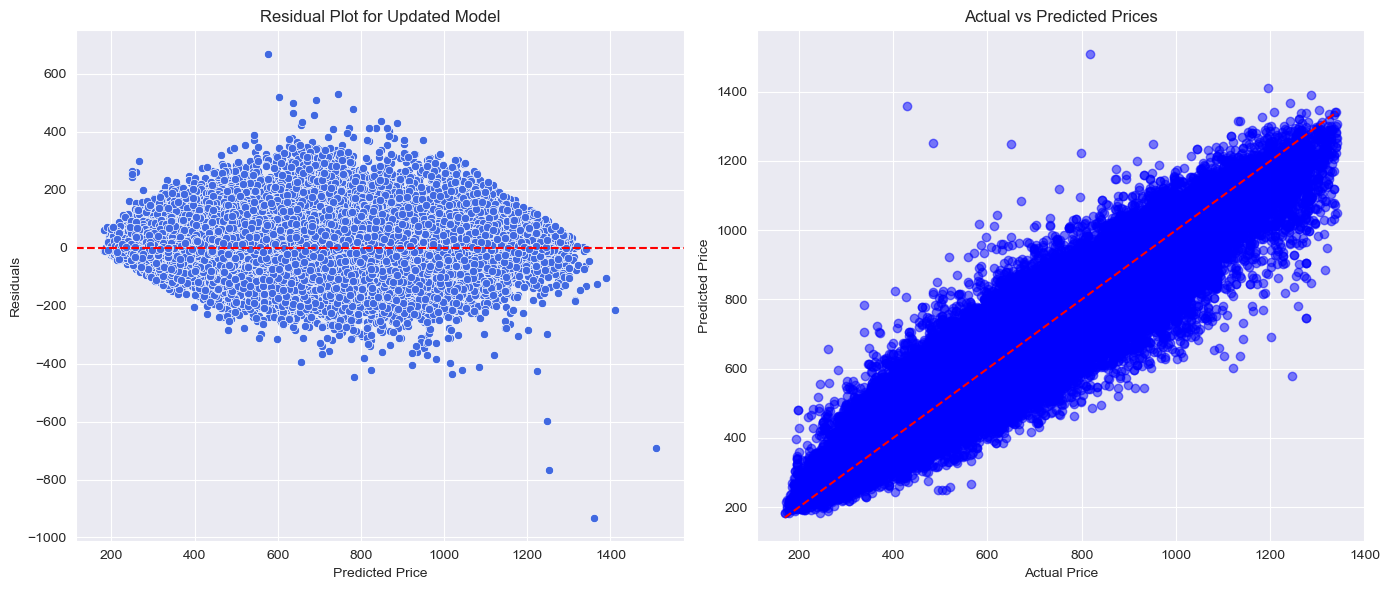

In [ ]:
# Calculate residuals for the updated model (Random Forest or other)
y_pred_updated = best_model.predict(X_test)  # או המודל המעודכן שלך

# Calculate residuals
residuals = y_test - y_pred_updated

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 🔹 Residual Plot
sns.scatterplot(x=y_pred_updated, y=residuals, color='royalblue', ax=axes[0])
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted Price')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot for Updated Model')

# 🔹 Actual vs. Predicted Prices
axes[1].scatter(y_test, y_pred_updated, alpha=0.5, color="blue")
axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="dashed", color="red")  # Ideal line
axes[1].set_xlabel("Actual Price")
axes[1].set_ylabel("Predicted Price")
axes[1].set_title("Actual vs Predicted Prices")

plt.tight_layout()
plt.show()


[17:35:08] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (369062, 16, 5904992).


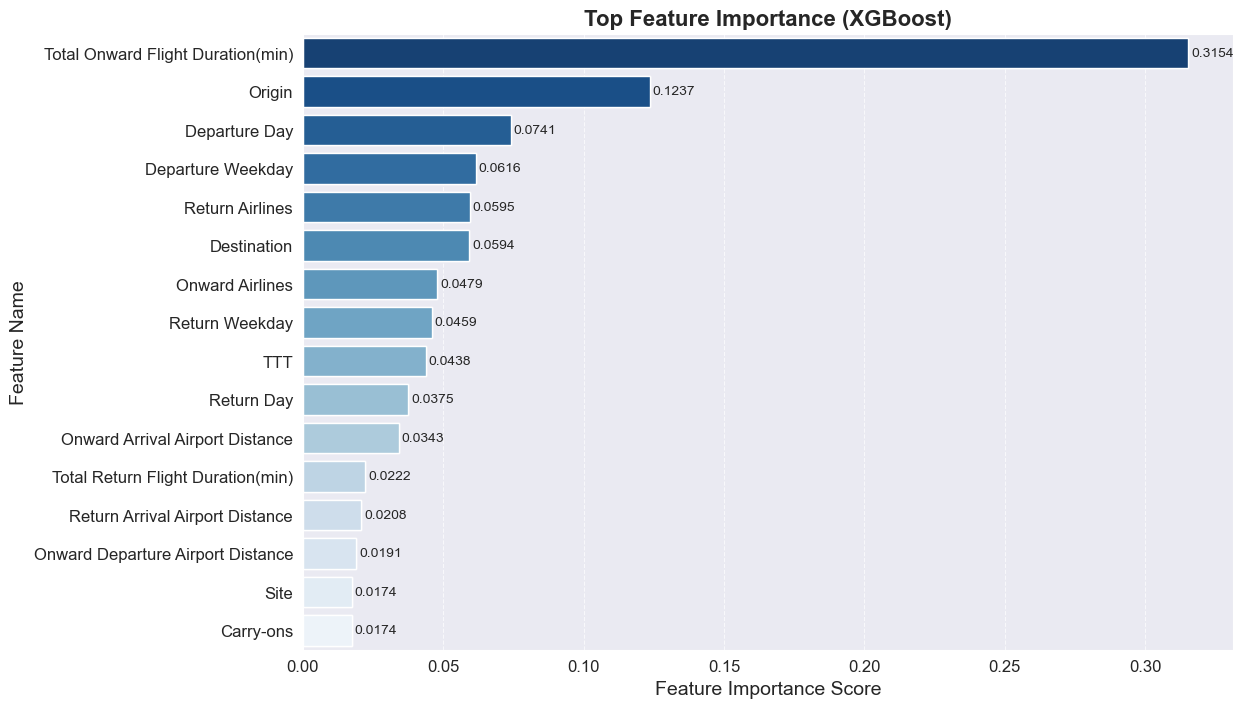

In [ ]:
xgb.fit(X_train, y_train)
importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": xgb.feature_importances_})

# Sort by importance and keep the top 15 features
importance_df = importance_df.sort_values(by="Importance", ascending=False).tail(50)

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")
ax = sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")  
for index, value in enumerate(importance_df["Importance"]):
    ax.text(value + 0.001, index, f"{value:.4f}", va="center", fontsize=10)
# Beautify the plot
plt.xlabel("Feature Importance Score", fontsize=14)
plt.ylabel("Feature Name", fontsize=14)
plt.title("Top Feature Importance (XGBoost)", fontsize=16, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

### **Visualization Insights**
1. **Residual Plot (Left Chart)**  
   - The residuals are randomly scattered around **zero**, indicating that the model does not suffer from major bias.
   - The variance of residuals remains fairly consistent across predicted values, suggesting **homoscedasticity** (constant variance), which is ideal for regression models.

2. **Actual vs. Predicted Prices (Right Chart)**  
   - The predicted prices align well with the actual values, forming a tight cluster around the **45-degree red dashed line**.
   - This suggests that the model has strong predictive capabilities, with minimal systematic errors.


## **Challenges & Considerations**
### **1. Overfitting Risks**
- **High variance models** (e.g., Decision Trees) initially showed signs of overfitting.  
- By using **cross-validation** and setting an optimal **max_depth (7)**, we **reduced overfitting** while preserving model flexibility.
- The **learning rate (0.2)** was carefully tuned to balance model stability and learning efficiency.

### **2. Feature Engineering & Selection**
- Some features may **introduce noise** rather than improve prediction accuracy.  
- Further analysis could apply **SHAP values or feature importance ranking** to refine feature selection.

### **3. Data Imbalance & Outliers**
- Price distribution showed some **outliers**, which may impact model performance.  
- Future improvements could include **robust regression methods** or anomaly detection.

## **Final Takeaways**
- The **XGBoost model**, after careful tuning, is the most **accurate and generalizable** for flight price prediction.  
- **Feature engineering and model tuning are crucial** to avoid overfitting while maintaining predictive power.  
- Future improvements can involve **deep learning techniques or additional external data** (e.g., real-time airline promotions).  

_________________

In [25]:

# Define the XGBoost model with the best-found parameters
xgb_model = XGBRegressor(
    colsample_bytree=1.0,
    gamma=0,
    learning_rate=0.2,
    max_depth=7,
    min_child_weight=1,
    n_estimators=500,
    subsample=1.0,
    objective='reg:squarederror',
    enable_categorical=True,
    random_state=101
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print performance metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 4133.21
R² Score: 0.9037
Mean Absolute Error (MAE): 47.14
Root Mean Squared Error (RMSE): 64.29


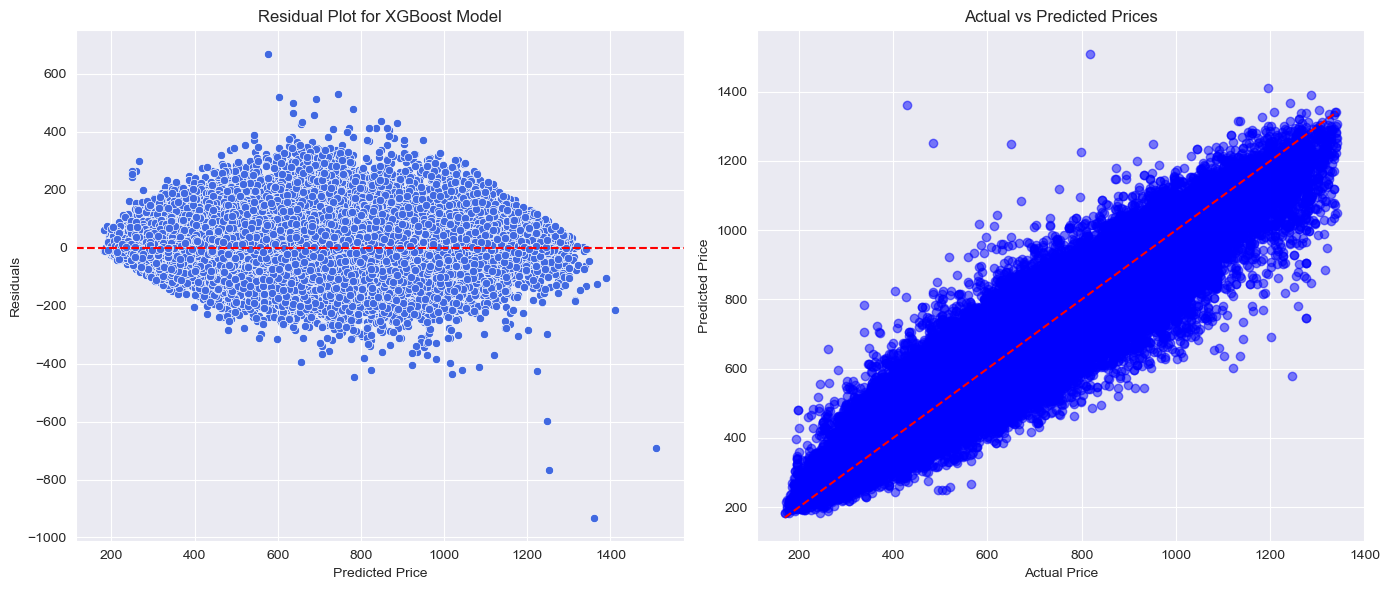

In [26]:
# Define the XGBoost model with the best-found parameters
xgb_model = XGBRegressor(
    colsample_bytree=1.0,
    gamma=0,
    learning_rate=0.2,
    max_depth=7,
    min_child_weight=1,
    n_estimators=500,
    subsample=1.0,
    objective='reg:squarederror',
    enable_categorical=True,
    random_state=101
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_updated = xgb_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred_updated

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 🔹 Residual Plot
sns.scatterplot(x=y_pred_updated, y=residuals, color='royalblue', ax=axes[0])
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted Price')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot for XGBoost Model')

# 🔹 Actual vs. Predicted Prices
axes[1].scatter(y_test, y_pred_updated, alpha=0.5, color="blue")
axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="dashed", color="red")  # Ideal line
axes[1].set_xlabel("Actual Price")
axes[1].set_ylabel("Predicted Price")
axes[1].set_title("Actual vs Predicted Prices")

plt.tight_layout()
plt.show()


In [28]:
error_analysis_df.columns

Index(['Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)', 'Origin', 'Onward Airlines',
       'Return Airlines', 'Destination', 'Carry-ons', 'Site',
       'Onward Departure Airport Distance', 'TTT',
       'Onward Arrival Airport Distance', 'Return Arrival Airport Distance',
       'Departure Weekday', 'Return Weekday', 'Departure Day', 'Return Day',
       'Residuals', 'Actual Price', 'Predicted Price'],
      dtype='object')

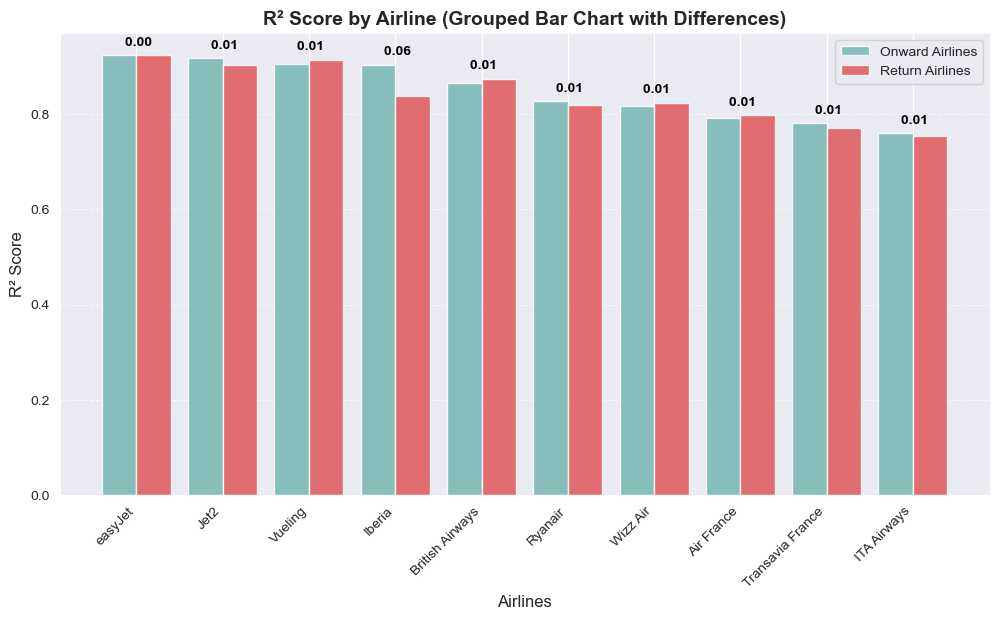

In [40]:
# Sort airlines by Onward R² score
sorted_airlines = onward_r2_series.sort_values(ascending=False).index

# Align both lists for consistency
onward_r2_series = onward_r2_series.loc[sorted_airlines]
return_r2_series = return_r2_series.loc[sorted_airlines]

# Compute R² difference (absolute)
r2_diff = abs(onward_r2_series - return_r2_series)

# Define bar width
bar_width = 0.4
x = np.arange(len(sorted_airlines))  # X positions

# Create the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Updated colors
onward_color = "#76B7B2"  # Soft teal
return_color = "#E15759"  # Soft red

# Plot bars side by side
onward_bars = ax.bar(x - bar_width/2, onward_r2_series.values, bar_width, color=onward_color, alpha=0.85, label="Onward Airlines")
return_bars = ax.bar(x + bar_width/2, return_r2_series.values, bar_width, color=return_color, alpha=0.85, label="Return Airlines")

# Add R² difference text above each group
for i, diff in enumerate(r2_diff):
    ax.text(x[i], max(onward_r2_series.values[i], return_r2_series.values[i]) + 0.02, f" {diff:.2f}",
            ha="center", fontsize=10, fontweight="bold", color="black")

# Labels and Formatting
ax.set_xlabel("Airlines", fontsize=12)
ax.set_ylabel("R² Score", fontsize=12)
ax.set_title("R² Score by Airline (Grouped Bar Chart with Differences)", fontsize=14, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(sorted_airlines, rotation=45, ha="right")
ax.legend()

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

 מה טוב בגרף הזה?
✅ השוואה ישירה בין הלוך לחזור – מאפשר לראות האם יש חברות מסוימות שבהן השגיאות גבוהות יותר בכיוון מסוים.
✅ מציג רק את 10 החברות עם הכי הרבה שגיאות – מפחית עומס נתונים ומבליט את המקרים הקריטיים.
✅ הפרדת צבעים – קל להבחין בהבדלים בין שגיאות הלוך ושגיאות חזור.

c:\Users\talmo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


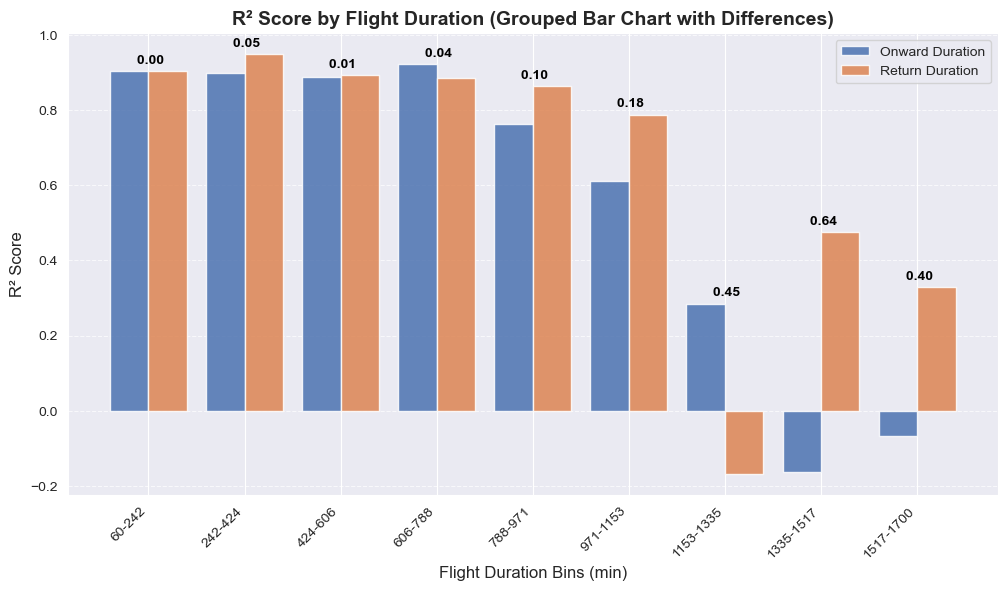

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Define bins for flight duration
bins = np.linspace(error_analysis_df["Total Onward Flight Duration(min)"].min(), 
                   error_analysis_df["Total Onward Flight Duration(min)"].max(), 10)

# Bin flight durations
error_analysis_df["Onward Duration Bin"] = np.digitize(error_analysis_df["Total Onward Flight Duration(min)"], bins) - 1
error_analysis_df["Return Duration Bin"] = np.digitize(error_analysis_df["Total Return Flight Duration(min)"], bins) - 1

# Calculate R² scores for each bin, removing empty bins
onward_r2_series = error_analysis_df.groupby("Onward Duration Bin").apply(lambda x: r2_score(x["Actual Price"], x["Predicted Price"])).dropna()
return_r2_series = error_analysis_df.groupby("Return Duration Bin").apply(lambda x: r2_score(x["Actual Price"], x["Predicted Price"])).dropna()

# Align bins to ensure same categories
common_bins = list(set(onward_r2_series.index) & set(return_r2_series.index))
onward_r2_series = onward_r2_series.loc[common_bins]
return_r2_series = return_r2_series.loc[common_bins]

# Compute absolute R² differences
r2_diff = abs(onward_r2_series - return_r2_series)

# Define bar width
bar_width = 0.4
x = np.arange(len(common_bins))  # X positions

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

# Updated colors
onward_color = "#4C72B0"  # Blue
return_color = "#DD8452"  # Orange

# Plot bars
onward_bars = ax.bar(x - bar_width/2, onward_r2_series.values, bar_width, color=onward_color, alpha=0.85, label="Onward Duration")
return_bars = ax.bar(x + bar_width/2, return_r2_series.values, bar_width, color=return_color, alpha=0.85, label="Return Duration")

# Add R² difference text above each pair
for i, diff in enumerate(r2_diff):
    ax.text(x[i], max(onward_r2_series.values[i], return_r2_series.values[i]) + 0.02, f" {diff:.2f}",
            ha="center", fontsize=10, fontweight="bold", color="black")

# Labels and Formatting
ax.set_xlabel("Flight Duration Bins (min)", fontsize=12)
ax.set_ylabel("R² Score", fontsize=12)
ax.set_title("R² Score by Flight Duration (Grouped Bar Chart with Differences)", fontsize=14, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels([f"{int(bins[i])}-{int(bins[i+1])}" for i in common_bins], rotation=45, ha="right")
ax.legend()

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


__________________________________

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import r2_score

# # Define mapping from numbers to weekday names
# weekday_mapping = {
#     0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
#     4: "Friday", 5: "Saturday", 6: "Sunday"
# }

# # Convert numerical weekdays to string labels
# error_analysis_df["Departure Weekday"] = error_analysis_df["Departure Weekday"].map(weekday_mapping)
# error_analysis_df["Return Weekday"] = error_analysis_df["Return Weekday"].map(weekday_mapping)

# # Compute R² scores
# onward_r2_series = error_analysis_df.groupby("Departure Weekday").apply(lambda x: r2_score(x["Actual Price"], x["Predicted Price"])).dropna()
# return_r2_series = error_analysis_df.groupby("Return Weekday").apply(lambda x: r2_score(x["Actual Price"], x["Predicted Price"])).dropna()

# # Print R² values before plotting
# print("Onward R² scores:\n", onward_r2_series)
# print("Return R² scores:\n", return_r2_series)

# # Ensure correct weekday order
# weekdays_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# onward_r2_series = onward_r2_series.reindex(weekdays_order)
# return_r2_series = return_r2_series.reindex(weekdays_order)

# # Check if there are valid values to plot
# if onward_r2_series.isnull().all() or return_r2_series.isnull().all():
#     print("No valid R² values found for departure or return weekdays.")
# else:
#     # Compute absolute R² differences
#     r2_diff = abs(onward_r2_series - return_r2_series)

#     # Define bar width
#     bar_width = 0.4
#     x = np.arange(len(weekdays_order))

#     # Create figure
#     fig, ax = plt.subplots(figsize=(12, 6))

#     # Colors
#     onward_color = "#6A9FB5"
#     return_color = "#E15759"

#     # Plot bars
#     ax.bar(x - bar_width/2, onward_r2_series.values, bar_width, color=onward_color, alpha=0.85, label="Departure Weekday")
#     ax.bar(x + bar_width/2, return_r2_series.values, bar_width, color=return_color, alpha=0.85, label="Return Weekday")

#     # Add R² difference text
#     for i, diff in enumerate(r2_diff):
#         ax.text(x[i], max(onward_r2_series.values[i], return_r2_series.values[i]) + 0.002, f"{diff:.3f}",
#                 ha="center", fontsize=10, fontweight="bold", color="black")

#     # Labels and Formatting
#     ax.set_xlabel("Weekday", fontsize=12)
#     ax.set_ylabel("R² Score", fontsize=12)
#     ax.set_title("R² Score by Departure and Return Weekday (Grouped Bar Chart with Differences)", fontsize=14, fontweight="bold")
#     ax.set_xticks(x)
#     ax.set_xticklabels(weekdays_order, rotation=45, ha="right")
#     ax.legend()

#     plt.grid(axis="y", linestyle="--", alpha=0.7)
#     plt.show()


Onward R² scores:
 Empty DataFrame
Columns: [Total Onward Flight Duration(min), Total Return Flight Duration(min), Origin, Onward Airlines, Return Airlines, Destination, Carry-ons, Site, Onward Departure Airport Distance, TTT, Onward Arrival Airport Distance, Return Arrival Airport Distance, Departure Weekday, Return Weekday, Departure Day, Return Day, Residuals, Actual Price, Predicted Price, Onward Bin, Return Bin, Onward Duration Bin, Return Duration Bin]
Index: []

[0 rows x 23 columns]
Return R² scores:
 Empty DataFrame
Columns: [Total Onward Flight Duration(min), Total Return Flight Duration(min), Origin, Onward Airlines, Return Airlines, Destination, Carry-ons, Site, Onward Departure Airport Distance, TTT, Onward Arrival Airport Distance, Return Arrival Airport Distance, Departure Weekday, Return Weekday, Departure Day, Return Day, Residuals, Actual Price, Predicted Price, Onward Bin, Return Bin, Onward Duration Bin, Return Duration Bin]
Index: []

[0 rows x 23 columns]


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

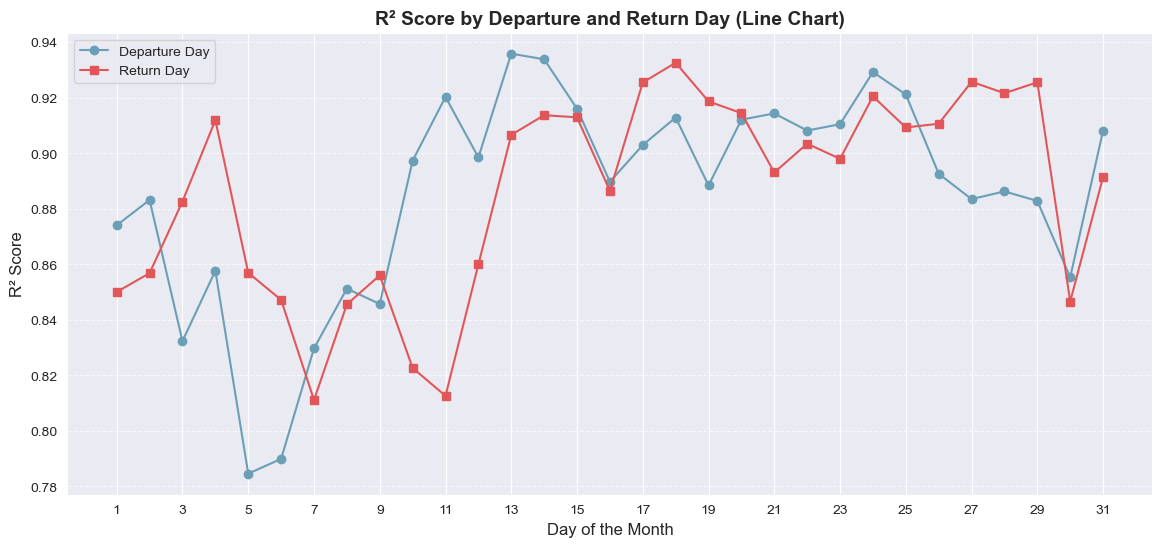

In [50]:
# Create a line chart for R² scores by day
fig, ax = plt.subplots(figsize=(14, 6))

# Plot Departure Day R²
ax.plot(days_order, onward_r2_series, marker="o", linestyle="-", color="#6A9FB5", label="Departure Day")

# Plot Return Day R²
ax.plot(days_order, return_r2_series, marker="s", linestyle="-", color="#E15759", label="Return Day")

# Labels and Formatting
ax.set_xlabel("Day of the Month", fontsize=12)
ax.set_ylabel("R² Score", fontsize=12)
ax.set_title("R² Score by Departure and Return Day (Line Chart)", fontsize=14, fontweight="bold")
ax.legend()

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(days_order[::2])  # Show every second day for readability
plt.show()


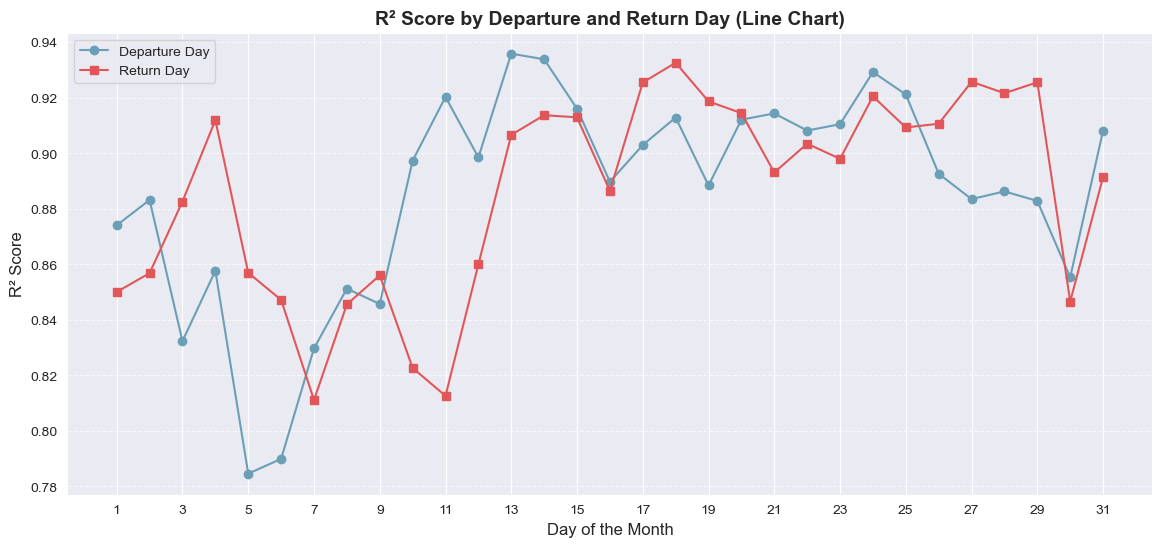

רק מפה